In [38]:
from ast import Constant
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

file_path = 'data/processed/cleaned_master.csv'
df = pd.read_csv(file_path)

# Define features and target variable
predictor = ['HDI for year']
response = 'suicides/100k pop'

# Initialize lists to store results
countries = []
slopes = []
r_squared_values = []
p_values = []

# Perform linear regression for each unique country
unique_countries = df['country'].unique()
for country in unique_countries:
    country_df = df[df['country'] == country]
    
    X = country_df[predictor]
    y = country_df[response]
    
    # Add constant to X for intercept
    X = sm.add_constant(X)
    
    # Fit linear regression model using statsmodels
    model = sm.OLS(y, X)
    results = model.fit()
    
    # Get slope, R-squared, and p-value
    slope = results.params['HDI for year']
    r_squared = results.rsquared
    p_value = results.pvalues['HDI for year']
    
    # Append results to lists
    countries.append(country)
    slopes.append(slope)
    r_squared_values.append(r_squared)
    p_values.append(p_value)

# Create DataFrame with results
results_df = pd.DataFrame({
    'country': countries,
    'slope': slopes,
    'r_squared': r_squared_values,
    'p_value': p_values
})

# Find the country with the highest slope based on HDI
country_with_max_slope = results_df.loc[results_df['slope'].idxmax()] 

# Print results
print(f"Highest slope value based on HDI: {country_with_max_slope['slope']}")
print(f"R-squared value for this country: {country_with_max_slope['r_squared']}")
print(f"P-value for HDI coefficient: {country_with_max_slope['p_value']}\n")


# Print significant results 
significant_results_df = results_df[results_df['p_value'] < 0.05]
if not significant_results_df.empty:
    MAX_slope_significant = significant_results_df.loc[significant_results_df['slope'].idxmax()]
    print(f"Country with highest significant slope: {MAX_slope_significant}/n")
else:
    print("No significant results found with p-value < 0.05")
print("A positive slope in the context of HDI (Human Development Index) vs suicide rate suggests that as the HDI increases, the suicide rate tends to increase as well. Countries with higher HDI generally have better socioeconomic indicators such as income, education, and life expectancy. These factors contribute to overall well-being but can also lead to higher expectations and pressures. Something we can target as a company")




c:\Users\sds70\miniconda3\envs\dsi_participant\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


Highest slope value based on HDI: 11853.419768318128
R-squared value for this country: 0.07333016905905998
P-value for HDI coefficient: 0.11016750827580955

Country with highest significant slope: country      Bosnia and Herzegovina
slope                   1001.759259
r_squared                   0.25146
p_value                    0.012545
Name: 13, dtype: object/n
A positive slope in the context of HDI (Human Development Index) vs suicide rate suggests that as the HDI increases, the suicide rate tends to increase as well. Countries with higher HDI generally have better socioeconomic indicators such as income, education, and life expectancy. These factors contribute to overall well-being but can also lead to higher expectations and pressures. Something we can target as a company


c:\Users\sds70\miniconda3\envs\dsi_participant\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [39]:
coefficients = results.params
print(coefficients)

const          -0.783321
HDI for year    1.434039
dtype: float64


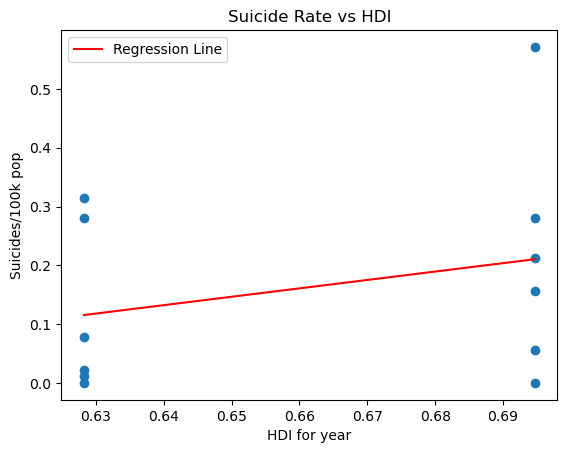

In [45]:
 from matplotlib import pyplot as plt


plt.scatter(country_df['HDI for year'], country_df[response])
plt.plot(country_df['HDI for year'], -0.783 + 1.43 * country_df['HDI for year'], color='red', label='Regression Line')
plt.xlabel('HDI for year')
plt.ylabel('Suicides/100k pop')
plt.title ('Suicide Rate vs HDI')
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:      suicides/100k pop   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     20.55
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           5.86e-06
Time:                        18:12:16   Log-Likelihood:                -51603.
No. Observations:               11100   AIC:                         1.032e+05
Df Residuals:                   11098   BIC:                         1.032e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.4360      1.999      0.718   

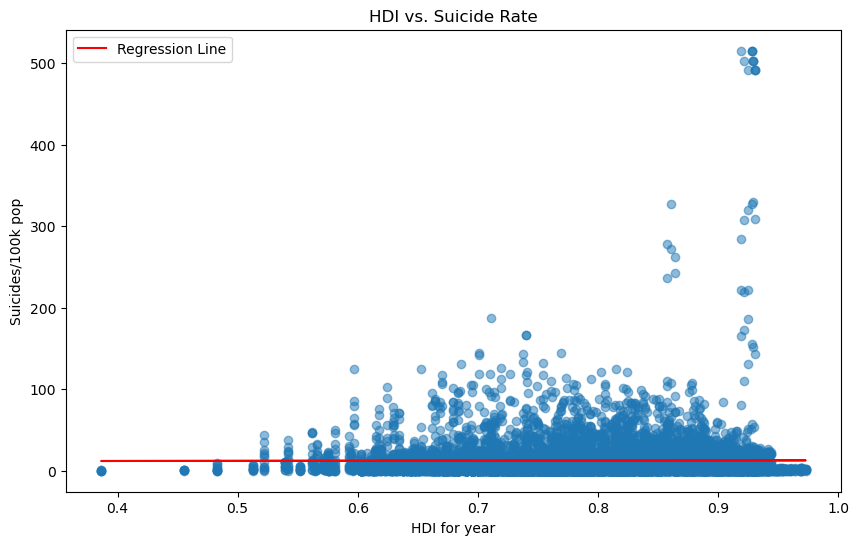

In [47]:
# Linear regression for with data from all countries 

import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt

file_path = 'data/processed/cleaned_master.csv'
df = pd.read_csv(file_path)

# Extract 'HDI' and 'suicides/100k pop'
HDI = 'HDI for year'
Suiciderate = 'suicides/100k pop'
X = df[[HDI]]
y = df[Suiciderate]

# Add constant to X for intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


# Plotting the scatter plot for all data points
plt.figure(figsize=(10, 6))
plt.scatter(df[HDI], df[Suiciderate], alpha=0.5)
plt.plot(df[HDI], 11.37 + 1.436 * df[HDI], color='red', label='Regression Line')
plt.xlabel('HDI for year')
plt.ylabel('Suicides/100k pop')
plt.title('HDI vs. Suicide Rate')
plt.legend()
plt.show()
